# **statement**

**We have an  Ecommerce Customers data of a company and The company is trying to decide whether to focus their efforts on their mobile app experience or their website.**

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler

In [23]:
dataset = pd.read_csv("https://raw.githubusercontent.com/araj2/customer-database/master/Ecommerce%20Customers.csv")

# **Take look into our dataset**

In [24]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [25]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# **checking for null values in the dataset**

In [26]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

*As there is no null values we can continue with outliers detection*

# **Checking for outliers using boxplot**

In [27]:
dataset.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

**A function for box plot**

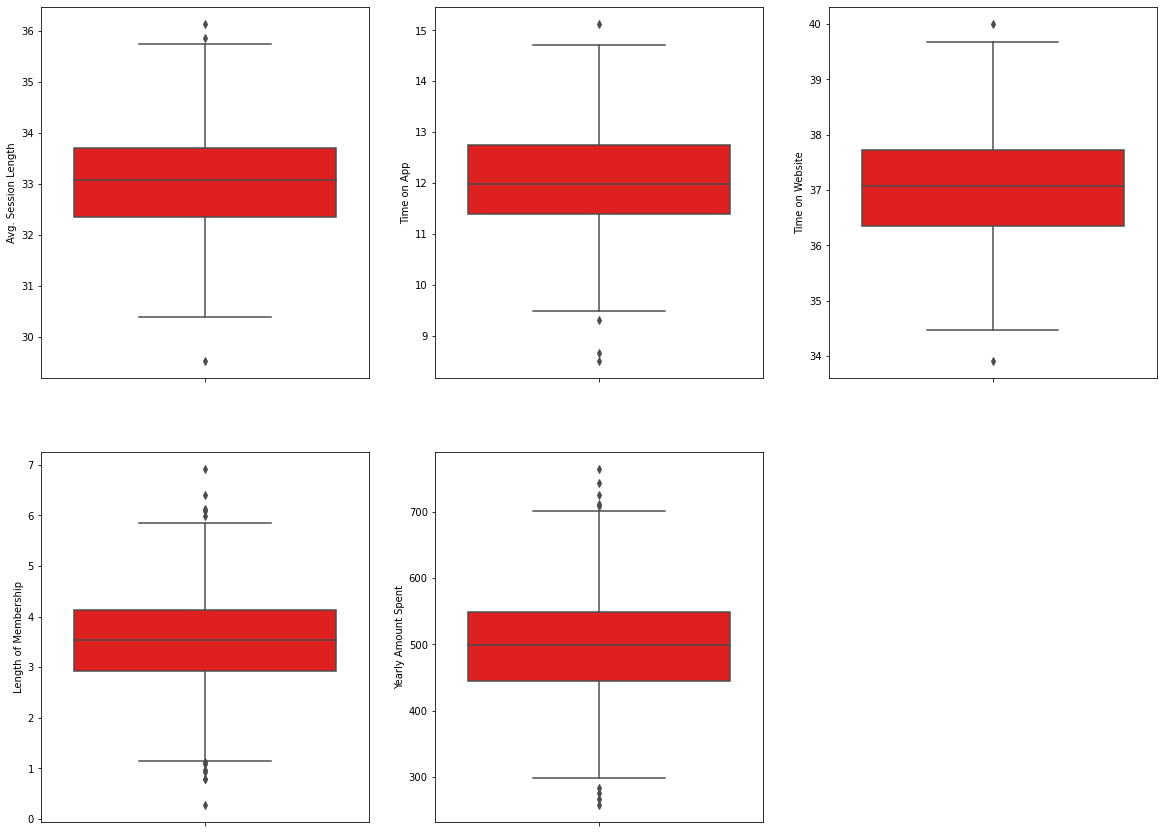

In [28]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="red", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="red", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="red", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="red", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="red", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

There are too many outliers so we have to remove then 

**A function for outliers**

In [29]:
def outliers_detector(data,features):
    outliers = []
    for i in features:
      Q1 = data[i].quantile(0.25)
      Q2 = data[i].quantile(0.5)
      Q3 = data[i].quantile(0.75)
      iqr = Q3 - Q1
      mini = Q1 - 1.5 * iqr
      maxi = Q3 + 1.5 * iqr
      print(f"mini,{mini},maxi,{maxi},Q1,{Q1},medain,{Q2},Q3,{Q3},irq,{iqr},{i}")
      outliers.extend(list(data[i].index[(data[i] > maxi) | (data[i] < mini)]))
    return outliers

ind = outliers_detector(dataset.iloc[:,3:],list(dataset.columns)[3:])
print(ind,len(dataset))


mini,30.28657747536273,maxi,35.767229553109516,Q1,32.34182200451777,medain,33.08200760262899,Q3,33.71198502395447,irq,1.3701630194366956,Avg. Session Length
mini,9.3396088251313,maxi,14.802394229583683,Q1,11.388153351800943,medain,11.983231258825267,Q3,12.753849702914039,irq,1.3656963511130957,Time on App
mini,34.29849491039147,maxi,39.76719469493466,Q1,36.34925732959517,medain,37.069366582835826,Q3,37.716432275730966,irq,1.3671749461357976,Time on Website
mini,1.136371357955959,maxi,5.920580296370714,Q1,2.930449709861492,medain,3.5339750035877096,Q3,4.126501944465181,irq,1.1960522346036888,Length of Membership
mini,288.62495124023667,maxi,705.7271533863172,Q1,445.03827704501686,medain,498.887875469115,Q3,549.313827581537,irq,104.27555053652014,Yearly Amount Spent
[12, 154, 390, 65, 309, 362, 442, 69, 157, 50, 151, 153, 157, 161, 173, 225, 303, 379, 396, 434, 447, 50, 65, 157, 205, 225, 299, 303, 368, 415] 500


**function to remove outliers**

In [30]:
def outliers_remover(data,outliers):
  data.drop(set(outliers),inplace=True)
  return data
df = outliers_remover(dataset,ind)
print(len(df))

476


After removeing outliers

<AxesSubplot:ylabel='Yearly Amount Spent'>

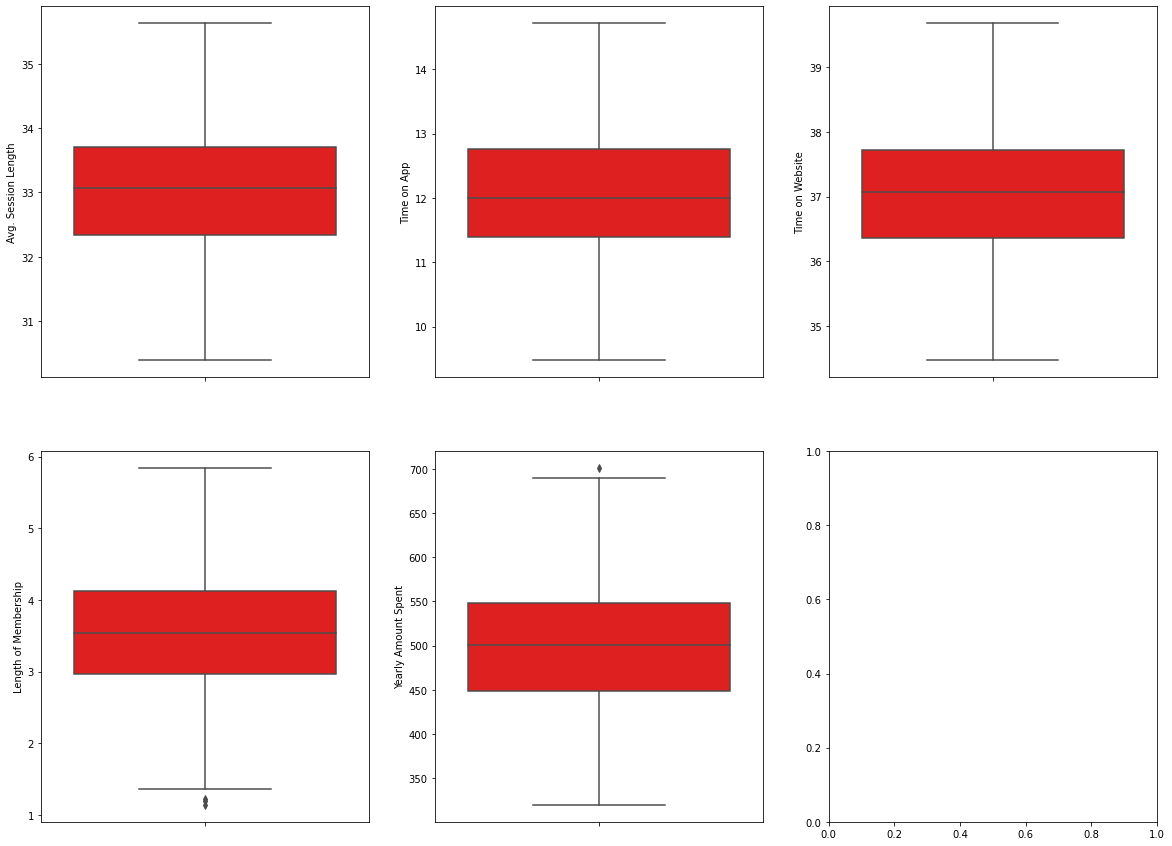

In [31]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=df["Avg. Session Length"],color="red", ax=axes[0,0])
sns.boxplot(y=df["Time on App"],color="red", ax=axes[0,1])
sns.boxplot(y=df["Time on Website"],color="red", ax=axes[0,2])
sns.boxplot(y=df["Length of Membership"],color="red", ax=axes[1,0])
sns.boxplot(y=df["Yearly Amount Spent"],color="red", ax=axes[1,1])


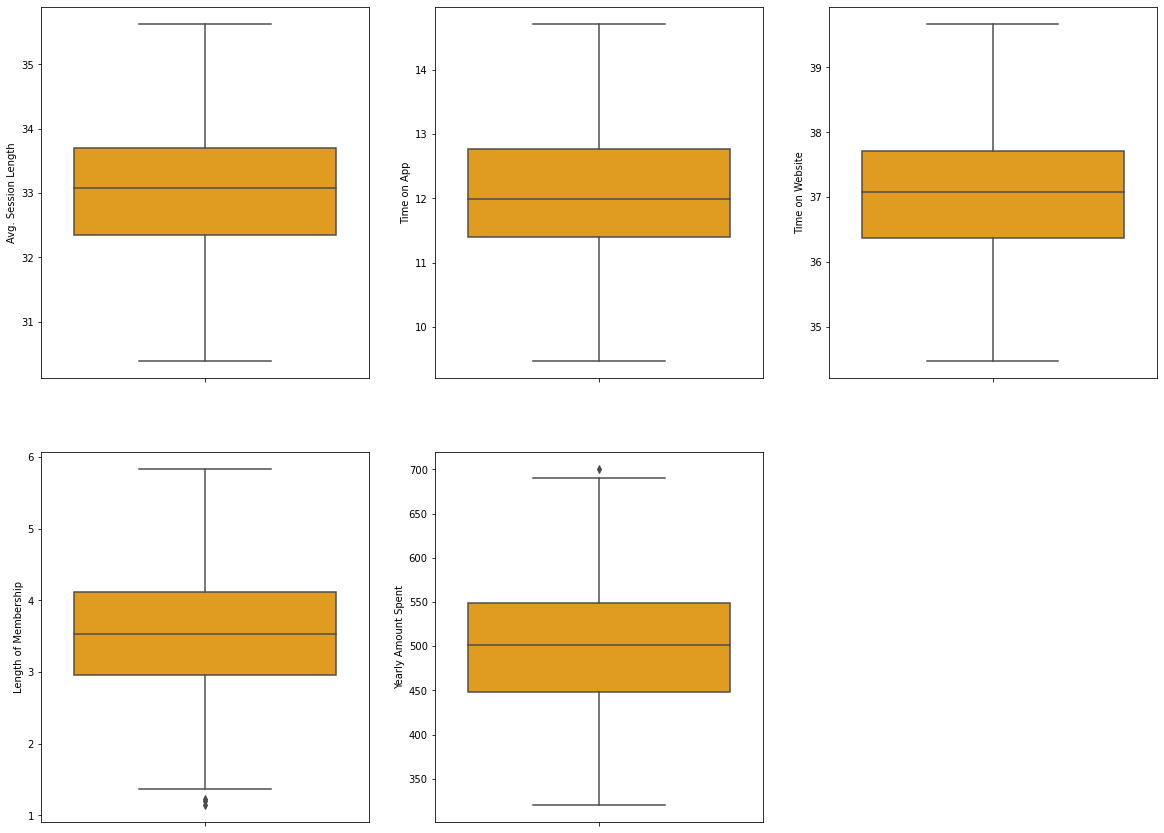

In [32]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="orange", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="orange", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="orange", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="orange", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="orange", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

In [33]:
ind = outliers_detector(df.iloc[:,3:],list(df.columns)[3:])
print(ind,len(df))
dataset = outliers_remover(dataset,ind)
print(len(dataset))

mini,30.303772420236818,maxi,35.7385713116527,Q1,32.34182200451777,medain,33.07713320079979,Q3,33.70052172737174,irq,1.3586997228539701,Avg. Session Length
mini,9.343339141945862,maxi,14.820702766577782,Q1,11.397350501182832,medain,11.995166947195546,Q3,12.766691407340812,irq,1.36934090615798,Time on App
mini,34.33833717325757,maxi,39.743289337215,Q1,36.36519423474161,medain,37.07558311153922,Q3,37.716432275730966,irq,1.351238040989358,Time on Website
mini,1.2375065695931933,maxi,5.84693873748812,Q1,2.9660436325537907,medain,3.5354454477463864,Q3,4.118401674527522,irq,1.1523580419737316,Length of Membership
mini,298.27213143575204,maxi,698.3805170868752,Q1,448.31277605492323,medain,501.1113683678547,Q3,548.339872467704,irq,100.02709641278079,Yearly Amount Spent
[214, 320, 487, 24] 476
472


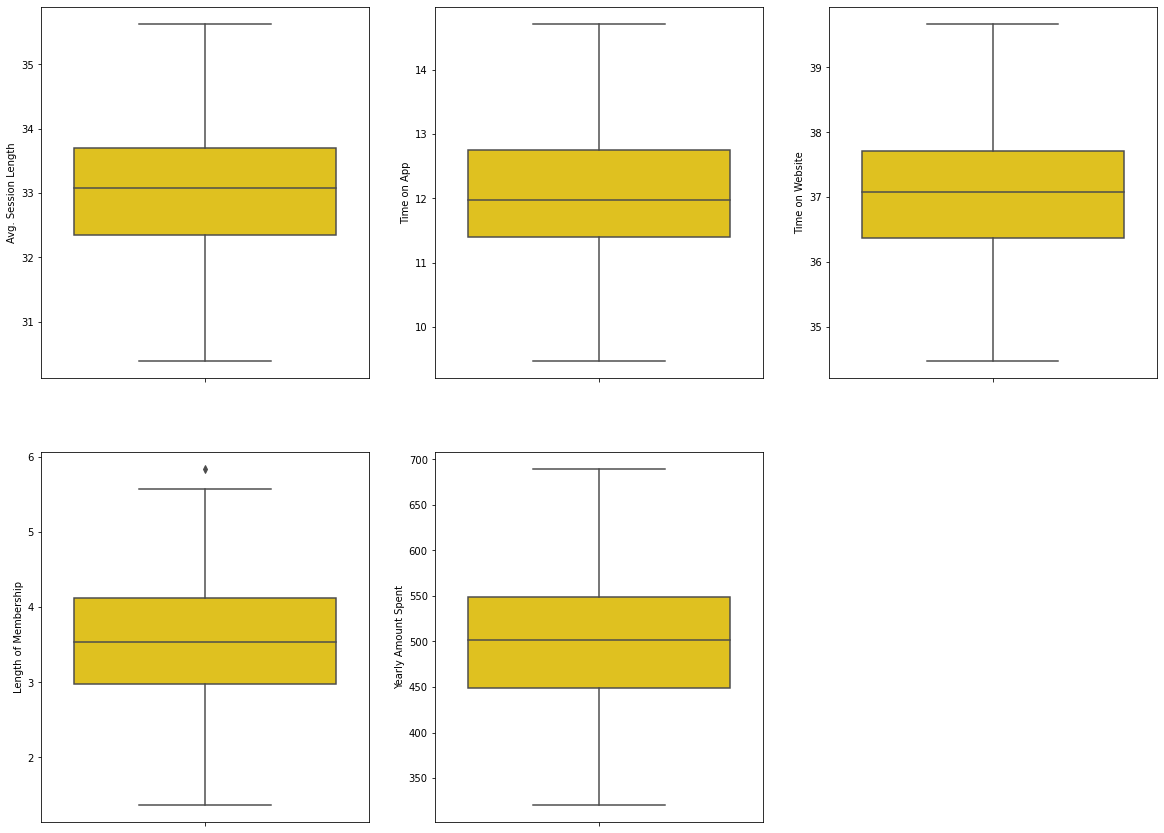

In [34]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.boxplot(y=dataset["Avg. Session Length"],color="gold", ax=axes[0,0])
sns.boxplot(y=dataset["Time on App"],color="gold", ax=axes[0,1])
sns.boxplot(y=dataset["Time on Website"],color="gold", ax=axes[0,2])
sns.boxplot(y=dataset["Length of Membership"],color="gold", ax=axes[1,0])
sns.boxplot(y=dataset["Yearly Amount Spent"],color="gold", ax=axes[1,1])
fig.delaxes(axes.flatten()[5])

still we had outliers so  call the above functions once again

now we are free from the that outliers

#**checking correlation of datset**

---



<AxesSubplot:>

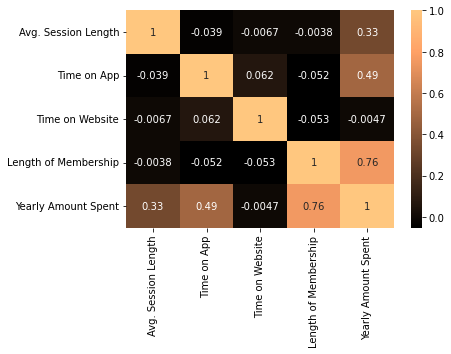

In [35]:
sns.heatmap(dataset.corr(),annot=True,cmap="copper")

# **function for dist plot**

/home/ramu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ramu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ramu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

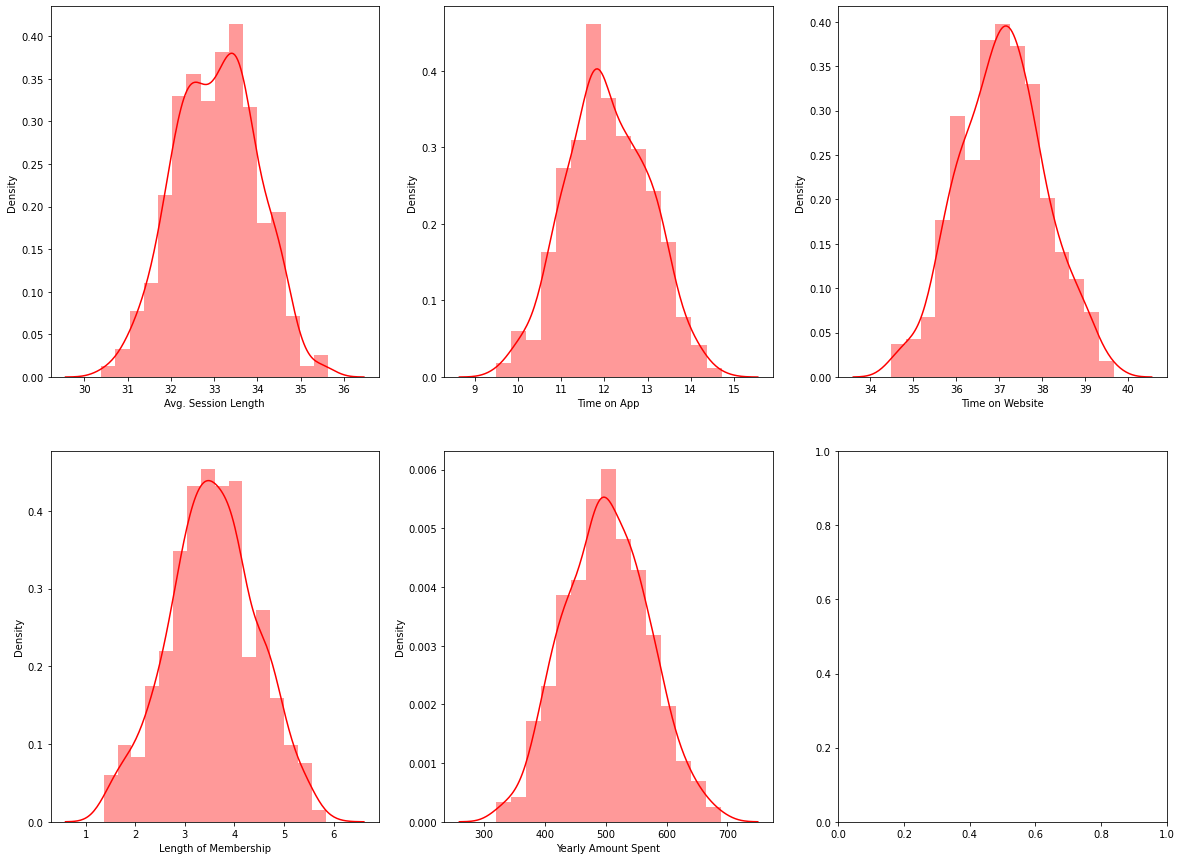

In [36]:
fig, axes = plt.subplots(2, 3,figsize=(20, 15))
sns.distplot(dataset["Avg. Session Length"],color="red", ax=axes[0,0])
sns.distplot(dataset["Time on App"],color="red", ax=axes[0,1])
sns.distplot(dataset["Time on Website"],color="red", ax=axes[0,2])
sns.distplot(dataset["Length of Membership"],color="red", ax=axes[1,0])
sns.distplot(dataset["Yearly Amount Spent"],color="red", ax=axes[1,1])

/home/ramu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ramu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ramu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ramu

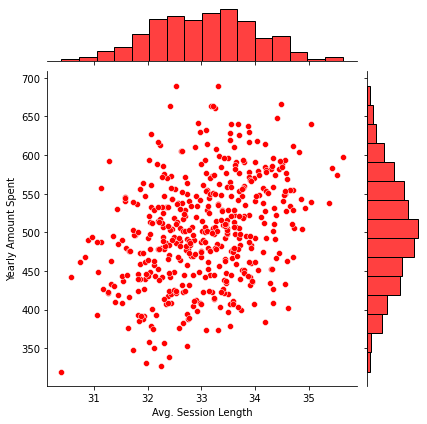

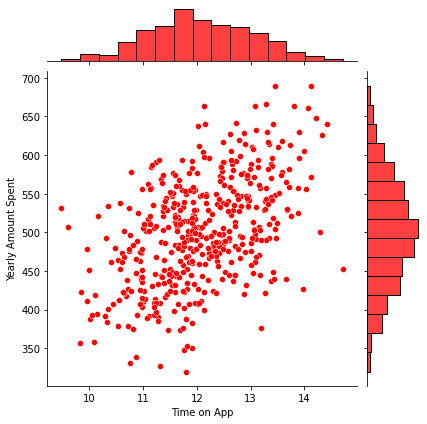

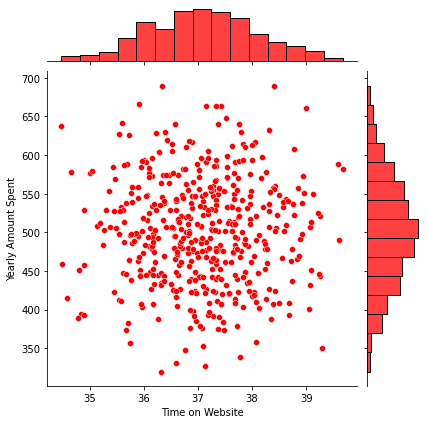

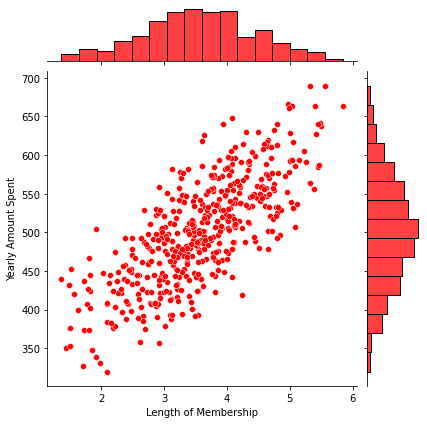

In [37]:
for i in df.columns[3:-1]:
  sns.jointplot(df[i],df.iloc[:,-1],color="red")

**make a pair plot to get more details regrading the dataset**

In [54]:
dataset["more_or_less"] = dataset["Yearly Amount Spent"].apply(lambda x: "more" if x > 500 else("less"))


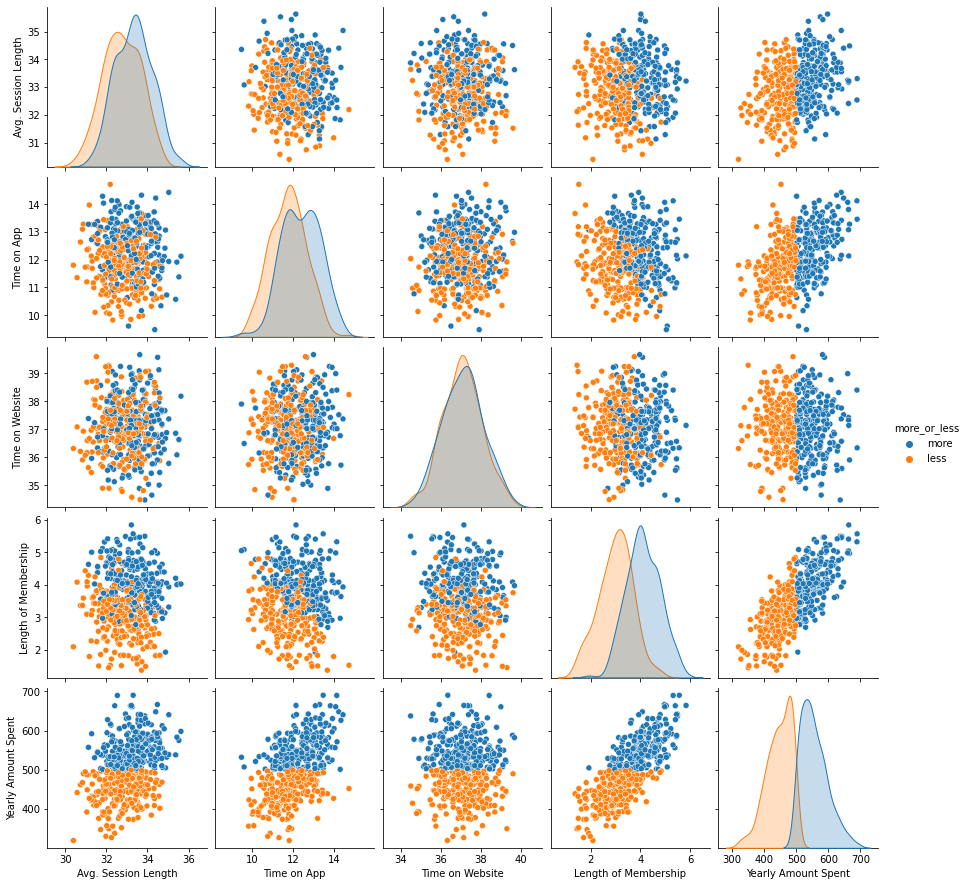

In [55]:
sns.pairplot(dataset,hue="more_or_less")

# Started buliding model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import statsmodels.api as sm


**Decalaring independent and dependent features**

In [19]:
x= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]

In [40]:
standscaler = StandardScaler()
standscaler.fit_transform(x)

array([[ 1.544765  ,  0.61720163,  2.52002703,  0.59909585],
       [-1.17842015, -0.9994536 ,  0.20022516, -1.01896773],
       [-0.04016421, -0.76857293,  0.04110285,  0.6241011 ],
       ...,
       [-0.4152654 , -0.59173408,  1.26895302,  1.59786995],
       [ 0.3004583 ,  0.34093176, -0.23070859, -1.39257622],
       [ 0.71723011,  0.36956513, -1.30491472, -0.93784092]])

**spliting tarining and testing data**

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)

**Applying Linear regression model**

In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Predecton test Values**

In [43]:
pred = lr.predict(x_test)

/home/ramu/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly Amount Spent'>

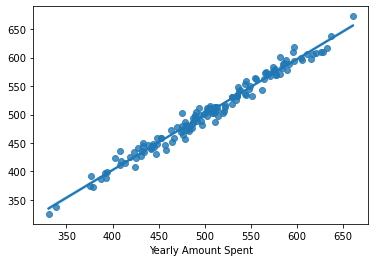

In [44]:
sns.regplot(y_test,pred)

In [45]:
mse = mean_squared_error(y_test,pred)
print(f" mean square error {mse}"," \n",f"squared mean square error {mse**0.5}")#,mean_square_error_mine(y_test,pred))
print(f" mean absolute error {mean_absolute_error(y_test,pred)}")

 mean square error 101.56600317749326  
 squared mean square error 10.077995990150683
 mean absolute error 7.996276679646499


In [46]:
model = sm.OLS(y,x).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          6.043e+04
Date:                 Fri, 13 Jan 2023   Prob (F-statistic):                        0.00
Time:                         14:13:06   Log-Likelihood:                         -2133.6
No. Observations:                  472   AIC:                                      4275.
Df Residuals:                      468   BIC:                                      4292.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [47]:
"Traing Accuracy",lr.score(x_train,y_train)

('Traing Accuracy', 0.9789412667480526)

In [48]:
"Testing Accuracy",lr.score(x_test,y_test)

('Testing Accuracy', 0.9776058736717433)

In [49]:
pd.DataFrame(lr.coef_,index=x_train.columns)

,0
Avg. Session Length,25.822736
Time on App,39.027497
Time on Website,0.609086
Length of Membership,61.263852


# **conclusion of project**

## **Regarding model predection**

**As our R square and abjusted R square scores is good, we can conclude that our model was good at predecting**

## **where should the company focus on app/website**

We can interpret this data to make certain observations, for example:- If all other factors are kept constant then increasing the "Avg. Session Length" by one unit will increase the yearly amount spent by a customer by an estimate of $25$.

Similarly increasing "Time on App" by one unit increases yearly amount spent by $39$ whereas, increasing Time on Website by one unit increases yearly amount spent by only $0.6$ approximately.

According to the data above the largest increase of approximately $61.26$ is observed when the "Length of Membership" is increased by one unit.

Using the predictions above we can develop ways in order to increase yearly amount spent by the customers. We can improve the app experience so that the users spend more of their time on the app or we can also focus on the website and develop it so that it becomes as efficient as the app or we can focus on customer relationship so that people remain members for long periods of time.

**The company should focus on the mobile app**